<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/timeseries_kate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kats

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]


In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
wpi_df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')

In [7]:
wpi_df.rename(columns = {'Date':'time'}, inplace = True)

In [8]:
wpi_df.rename(columns = {'WPI':'value'}, inplace = True)

In [9]:

wpi_df

,time,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,value
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [10]:
ts_df=wpi_df.drop(['pH','DO','TDS','Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate'], axis = 1)

In [11]:
ts_df.head()

,time,value
0,01-Jan-14,0.249528
1,02-Jan-14,0.216400
2,03-Jan-14,0.183814
3,04-Jan-14,0.219282
4,05-Jan-14,0.165831


In [12]:
wpi_ts = TimeSeriesData(ts_df)

In [13]:
print(type(wpi_ts))

<class 'kats.consts.TimeSeriesData'>


In [14]:
print(type(wpi_ts.time))
print(type(wpi_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


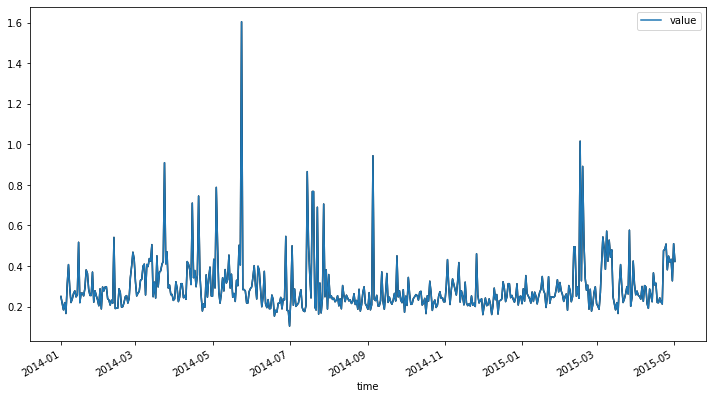

In [15]:
%matplotlib inline

# Must pass the name of the value columns to plot
wpi_ts.plot(cols=['value'])
plt.show()

In [16]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(wpi_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# the predict method returns a dataframe as follows
fcst.head()

,time,fcst,fcst_lower,fcst_upper
0,2015-06-01,0.342464,0.179606,0.509467
1,2015-07-01,0.372426,0.219694,0.545870
2,2015-08-01,0.372758,0.222418,0.533309
3,2015-09-01,0.365615,0.214002,0.536163
4,2015-10-01,0.376302,0.218430,0.550935


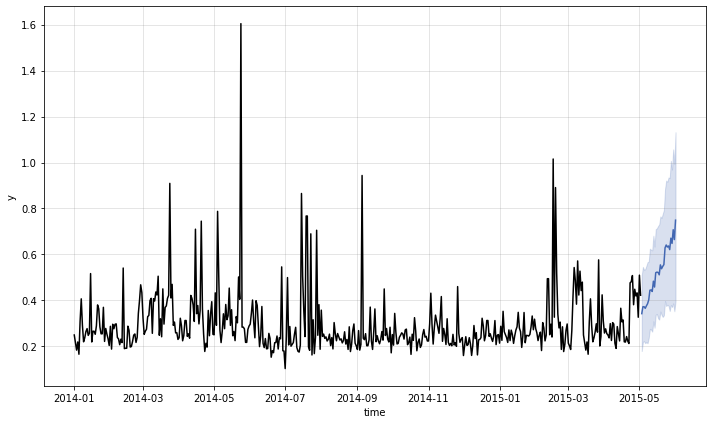

In [18]:
# visualize the results with uncertainty intervals
m.plot()

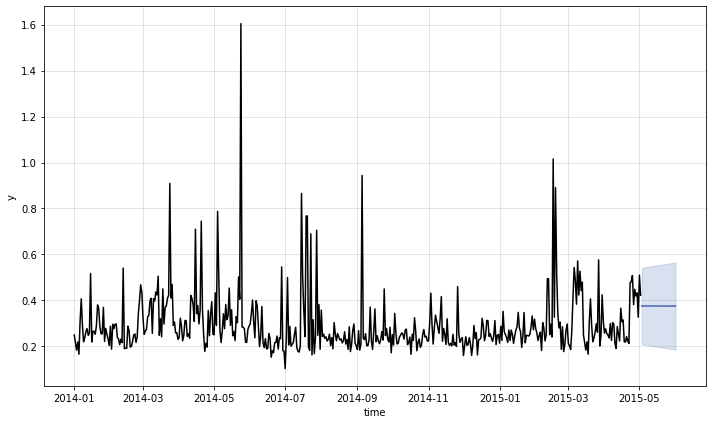

In [19]:
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=wpi_ts, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=30, alpha=0.2)

# visualize the results
m.plot()

In [20]:
# Initiate feature extraction class
from kats.tsfeatures.tsfeatures import TsFeatures
tsFeatures = TsFeatures()

In [21]:
features_wpi = TsFeatures().transform(wpi_ts)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [22]:
features_wpi

{'binarize_mean': 0.3141683778234086,
 'crossing_points': 183,
 'diff1y_acf1': -0.482090248316205,
 'diff1y_acf5': 0.24502482659818609,
 'diff1y_pacf5': 0.3894574994060626,
 'diff2y_acf1': -0.6768331570494661,
 'diff2y_acf5': 0.519429007895662,
 'diff2y_pacf5': 1.0142089270308825,
 'entropy': 0.9169026581081303,
 'firstmin_ac': 3,
 'firstzero_ac': 26,
 'flat_spots': 2,
 'heterogeneity': 12.646202594623908,
 'histogram_mode': 0.10353119,
 'holt_alpha': 0.1024919177644301,
 'holt_beta': 0.0,
 'hurst': 0.03171174232777481,
 'hw_alpha': 0.1604245953325259,
 'hw_beta': 6.564010130807034e-11,
 'hw_gamma': 0.0,
 'length': 487,
 'level_shift_idx': 143,
 'level_shift_size': 0.07048009075000011,
 'linearity': 0.0011060157783546523,
 'lumpiness': 0.00036578301955597913,
 'mean': 0.29349141990759736,
 'peak': 6,
 'seas_acf1': 0.032781555821115686,
 'seas_pacf1': 0.0002267242727703909,
 'seasonality_strength': 0.3329699749785313,
 'spikiness': 5.3863600051501315e-09,
 'stability': 0.002084689965454

**Prophet**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


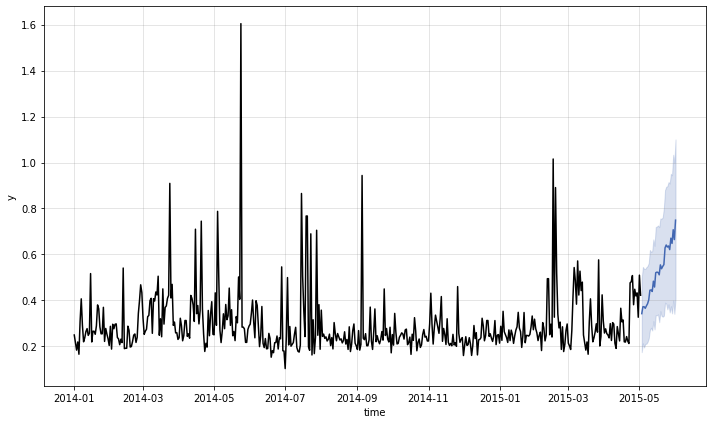

In [23]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(wpi_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

# plot to visualize
m.plot()

**Holt-Winters**

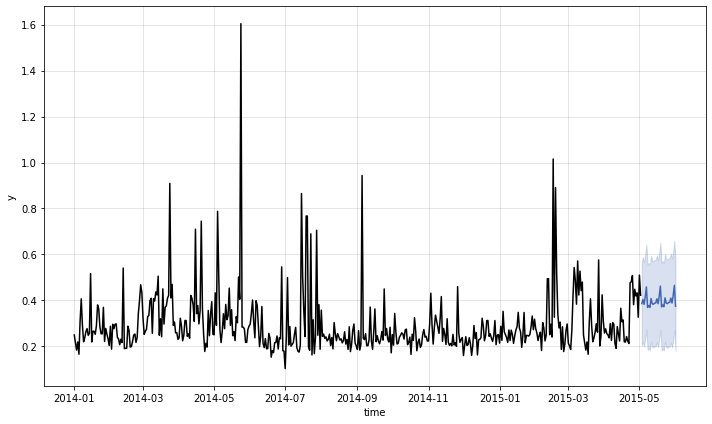

In [24]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=wpi_ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

 **Forecasting with Ensemble model**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


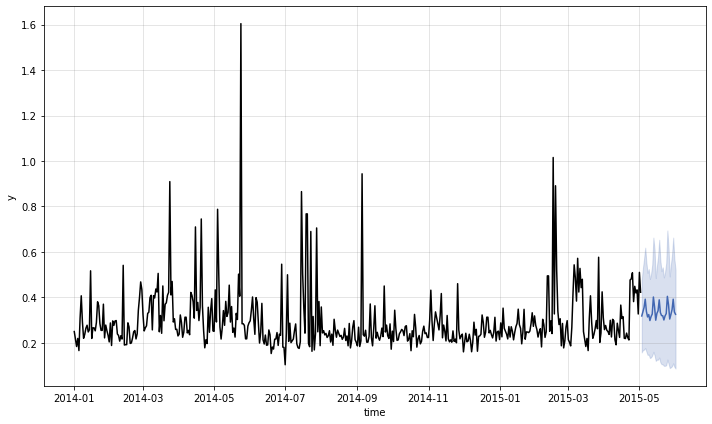

In [25]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,
    quadratic_model,
    sarima,
    theta,
)

# we need define params for each individual forecasting model in `EnsembleParams` class
# here we include 6 different models
model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()),
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

# create `KatsEnsembleParam` with detailed configurations 
KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

# create `KatsEnsemble` model
m = KatsEnsemble(
    data=wpi_ts, 
    params=KatsEnsembleParam
    )

# fit and predict
m.fit()

# predict for the next 30 steps
fcst = m.predict(steps=30)

# aggregate individual model results
m.aggregate()

# plot to visualize
m.plot()

**Forecasting with Meta-Learning**

In [26]:
from kats.models.metalearner.get_metadata import GetMetaData

# create an object MD of class GetMetaData with error method mean absolute percentage error (mape)
MD = GetMetaData(data=wpi_ts, error_method='mape')

In [27]:
MD.all_models

{'arima': kats.models.arima.ARIMAModel,
 'holtwinters': kats.models.holtwinters.HoltWintersModel,
 'prophet': kats.models.prophet.ProphetModel,
 'sarima': kats.models.sarima.SARIMAModel,
 'stlf': kats.models.stlf.STLFModel,
 'theta': kats.models.theta.ThetaModel}

In [28]:
MD.all_params

{'arima': kats.models.arima.ARIMAParams,
 'holtwinters': kats.models.holtwinters.HoltWintersParams,
 'prophet': kats.models.prophet.ProphetParams,
 'sarima': kats.models.sarima.SARIMAParams,
 'stlf': kats.models.stlf.STLFParams,
 'theta': kats.models.theta.ThetaParams}

In [29]:
# get meta data as a dictionary
wpi_metadata = MD.get_meta_data()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [30]:
wpi_metadata.keys()


dict_keys(['hpt_res', 'features', 'best_model', 'search_method', 'error_method'])

In [31]:
print(f"search_method: {wpi_metadata['search_method']}")
print(f"error_method: {wpi_metadata['error_method']}")

search_method: RandomSearch
error_method: mape


In [32]:
wpi_metadata['hpt_res'].keys()

dict_keys(['arima', 'holtwinters', 'prophet', 'theta', 'stlf', 'sarima'])

In [33]:
wpi_metadata['hpt_res']['arima']

({'d': 1, 'p': 2, 'q': 2}, 0.23413582789348722)

In [34]:
methods = list(wpi_metadata['hpt_res'].keys())
sorted(methods, key = lambda m: wpi_metadata['hpt_res'][m][1])

['holtwinters', 'sarima', 'theta', 'arima', 'prophet', 'stlf']

In [35]:
wpi_metadata['best_model']

'holtwinters'